


# 1.Prepare



## 1.1. Import Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
!pip install squarify
import squarify as sq
!pip install plotly --upgrade
import plotly.express as px


## 1.2  *Load data*

In [87]:
# load dataset into gg colab
from google.colab import files
uploaded = files.upload()

Saving RFM_Dataset.xlsx to RFM_Dataset.xlsx


In [88]:
# Read necessary sheet in uploaded file
orders = pd.read_excel(r'RFM_Dataset.xlsx', sheet_name='Orders')
segmentation=pd.read_excel(r'RFM_Dataset.xlsx', sheet_name='Segmentation')
returned=pd.read_excel(r'RFM_Dataset.xlsx', sheet_name='Return')
product=pd.read_excel(r'RFM_Dataset.xlsx', sheet_name='Product')

## *1.2 Checking dataset*

### 1.2.1 Checking Order table

In [89]:
# review orders dataframe
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926


In [90]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [91]:
# check if there any null values
orders.isnull().sum()

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Channel        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Unit Cost      0
dtype: int64

In [92]:
# Checking duplicated value
orders.duplicated().sum()

0

In [93]:
# Checkin unique order_ID
orders['Order ID'].is_unique

False

-> Review:
- There is no duplicated order ID
- order ID is not unique, because in each order ID buyers bought different products.
- There is also no null value in Orders table


### 1.2.2 Checking segmentation table

In [94]:
# review segmentation dataframe
segmentation.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [95]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [96]:
segmentation.duplicated().sum()

0

In [97]:
# Checkin unique order_ID
segmentation['RFM Score'].is_unique

True

-> Review:
- There is no dupliacted segmentation
- Need to separate RFM score into single row for each score

### 1.2.3 Checking return table

In [98]:
# review returnd dataframe
returned.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [99]:
returned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [100]:
# Checking duplicated value
returned.duplicated().sum()

0

In [101]:
# Checkin unique order_ID
returned['Order ID'].is_unique

True

-> Review:

- There is no dupliacted returned order ID
- No column has null value

### 1.2.4 Cheking product column

In [102]:
# review product dataframe
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [103]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [104]:
# Checking dupliacted
product['Product ID'].duplicated().sum()

32

-> Review
- Product ID has 32 duplicated value because there are some product have thea same ID, category, sub-category, and It's onlu have different product name

## *1.3 Cleaning data*

In [105]:
# group order_ID of each purchase
unique_order=orders.groupby(['Order ID','Order Date', 'Ship Date', 'Customer ID', 'Channel'])['Sales'].sum().reset_index()

unique_order.head()

,Order ID,Order Date,Ship Date,Customer ID,Channel,Sales
0,CA-2014-100006,2014-09-07,2014-09-13,DK-13375,Consumer,377.970
1,CA-2014-100090,2014-07-08,2014-07-12,EB-13705,Corporate,699.192
2,CA-2014-100293,2014-03-14,2014-03-18,NF-18475,Home Office,91.056
3,CA-2014-100328,2014-01-28,2014-02-03,JC-15340,Consumer,3.928
4,CA-2014-100363,2014-04-08,2014-04-15,JM-15655,Corporate,21.376


In [106]:
# Checking unique value
unique_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     5009 non-null   object        
 1   Order Date   5009 non-null   datetime64[ns]
 2   Ship Date    5009 non-null   datetime64[ns]
 3   Customer ID  5009 non-null   object        
 4   Channel      5009 non-null   object        
 5   Sales        5009 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 234.9+ KB


In [107]:
#  Find out what orders are completed and not being returned
Merge_orders=unique_order.merge(returned, on='Order ID', how='left', indicator=True )
# Filter so that only Order IDs from the left table remain and Order IDs from both tables are eliminated.
order_list=Merge_orders.loc[Merge_orders['_merge']=='left_only', 'Order ID']
# Create complicated order dataframe that contains only Order that were completed
comp_orders=unique_order[unique_order['Order ID'].isin(order_list)]

In [108]:
Merge_orders

,Order ID,Order Date,Ship Date,Customer ID,Channel,Sales,Returned,_merge
0,CA-2014-100006,2014-09-07,2014-09-13,DK-13375,Consumer,377.970,NaN,left_only
1,CA-2014-100090,2014-07-08,2014-07-12,EB-13705,Corporate,699.192,NaN,left_only
2,CA-2014-100293,2014-03-14,2014-03-18,NF-18475,Home Office,91.056,NaN,left_only
3,CA-2014-100328,2014-01-28,2014-02-03,JC-15340,Consumer,3.928,NaN,left_only
4,CA-2014-100363,2014-04-08,2014-04-15,JM-15655,Corporate,21.376,NaN,left_only
...,...,...,...,...,...,...,...,...
5004,US-2017-168802,2017-11-03,2017-11-07,JO-15145,Corporate,18.368,NaN,left_only
5005,US-2017-169320,2017-07-23,2017-07-25,LH-16900,Consumer,171.430,NaN,left_only
5006,US-2017-169488,2017-09-07,2017-09-09,AA-10375,Consumer,56.860,NaN,left_only
5007,US-2017-169502,2017-08-28,2017-09-01,MG-17650,Home Office,113.410,NaN,left_only


In [109]:
comp_orders.head()

,Order ID,Order Date,Ship Date,Customer ID,Channel,Sales
0,CA-2014-100006,2014-09-07,2014-09-13,DK-13375,Consumer,377.970
1,CA-2014-100090,2014-07-08,2014-07-12,EB-13705,Corporate,699.192
2,CA-2014-100293,2014-03-14,2014-03-18,NF-18475,Home Office,91.056
3,CA-2014-100328,2014-01-28,2014-02-03,JC-15340,Consumer,3.928
4,CA-2014-100363,2014-04-08,2014-04-15,JM-15655,Corporate,21.376


#  2.RFM Analysis

## *2.1 Recency*


In [110]:
# Create a new dataframe called latest_pur which is grouped by Customer ID, filter the latest date of purchase
lastest_pur=comp_orders.groupby(['Customer ID'])['Order Date'].max().reset_index()
lastest_pur.head()

,Customer ID,Order Date
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10


In [111]:
# Create a variable called today_date which is a milestone date to calculate
today_date = dt.datetime(2017,12,31)

In [112]:
# Create Dataframe called recency to pull out the latest purchase of each customer
recency = (today_date - lastest_pur.groupby("Customer ID").agg({"Order Date":"max"})).reset_index()

In [113]:
# Change recency column "Order date" name into "Recency"
recency.rename(columns = {"Order Date":"Recency"}, inplace = True)
recency.head()

,Customer ID,Recency
0,AA-10315,185 days
1,AA-10375,20 days
2,AA-10480,260 days
3,AA-10645,483 days
4,AB-10015,416 days


In [114]:
# Format recency column into days type
recency['Recency'] = recency["Recency"].apply(lambda x: x.days)
recency.head()

,Customer ID,Recency
0,AA-10315,185
1,AA-10375,20
2,AA-10480,260
3,AA-10645,483
4,AB-10015,416


In [115]:
# Merge dataframe
recency=pd.merge(lastest_pur,recency, on='Customer ID', how='left')
recency.head()

,Customer ID,Order Date,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416


## *2.2 Frequency*

In [116]:
# create frenquency df
frequency= comp_orders.groupby(['Customer ID'])['Order Date'].count().reset_index()
frequency.head()

,Customer ID,Order Date
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3


In [117]:
# Rename column  Order Date into Frequency
frequency.rename(columns = {"Order Date":"Frequency"}, inplace = True)
frequency.head()

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3


In [118]:
# Merge recency and frequency into rfm_df Dataframe
rfm_df=pd.merge(recency, frequency, on='Customer ID', how='left')

In [119]:
rfm_df.head()

,Customer ID,Order Date,Recency,Frequency
0,AA-10315,2017-06-29,185,5
1,AA-10375,2017-12-11,20,9
2,AA-10480,2017-04-15,260,4
3,AA-10645,2016-09-04,483,5
4,AB-10015,2016-11-10,416,3


## *2.3 Monetary*

In [120]:
# Create monetary dataframe by sum all Sales values from each Customer ID to calculate total sale from each customer.
monetary=comp_orders.groupby('Customer ID').agg({'Sales':'sum'}).reset_index()
monetary.head()

,Customer ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156


In [121]:
# rename column
monetary.rename(columns={'Sales':'Monetary'}, inplace=True)
monetary.head()

,Customer ID,Monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156


In [122]:
# merge monetary dataframe with rfm_df DataFrame to create RFM dataframe
rfm_df=pd.merge(rfm_df, monetary, on ='Customer ID', how='left')
rfm_df.head()

,Customer ID,Order Date,Recency,Frequency,Monetary
0,AA-10315,2017-06-29,185,5,5563.560
1,AA-10375,2017-12-11,20,9,1056.390
2,AA-10480,2017-04-15,260,4,1790.512
3,AA-10645,2016-09-04,483,5,5073.975
4,AB-10015,2016-11-10,416,3,886.156


In [123]:
# Drop column 'Order Date" from rfm_df dataframe
rfm_df.drop(['Order Date'],axis=1, inplace=True)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156


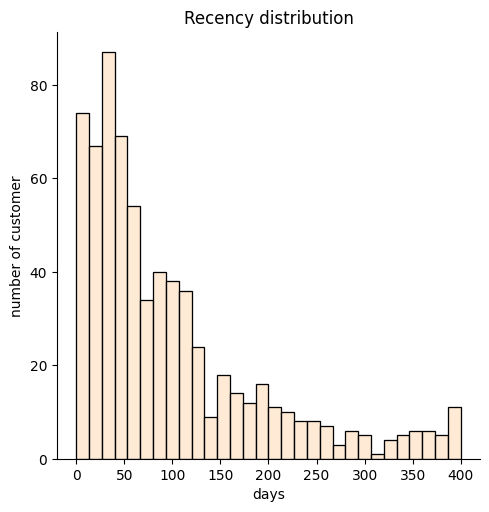

In [124]:
# Histplot of Recency
pal1=sns.color_palette('Blues')
sns.displot(data=rfm_df, x='Recency', stat='count',binrange=[0,400], bins=30).set(title='Recency distribution')
plt.xlabel('days')
plt.ylabel('number of customer')
plt.show()

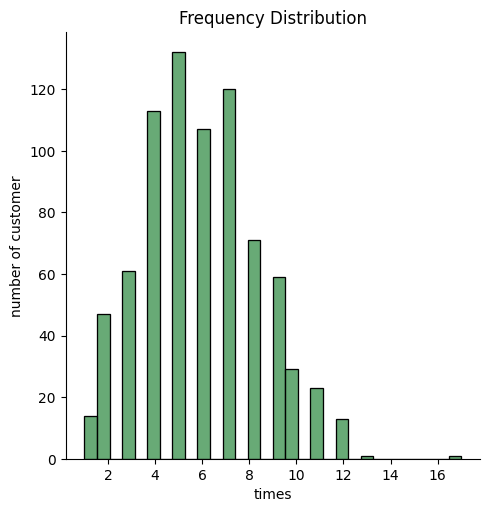

In [125]:
# Histplot of Frequency
pal2=sns.set_palette('PRGn_r')
sns.displot(data=rfm_df, x='Frequency', stat='count',bins=30, color=pal2).set(title='Frequency Distribution')
plt.ylabel('number of customer')
plt.xlabel('times')
plt.show()

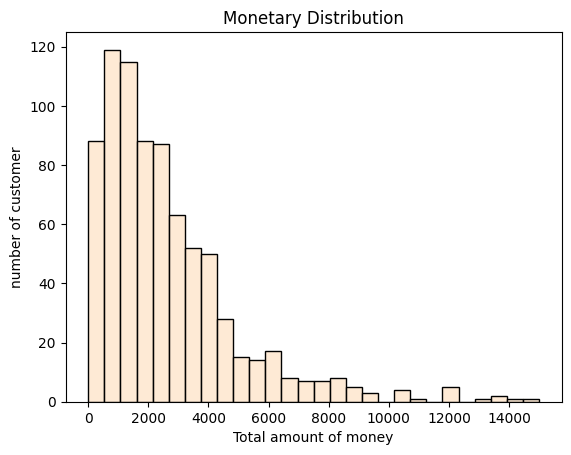

In [126]:
# Draw column chart of Monetary
pal3=sns.set_palette('Oranges')
sns.histplot(data=rfm_df, x='Monetary',binrange=[0,15000],color=pal3).set(title='Monetary Distribution')
plt.xlabel('Total amount of money')
plt.ylabel('number of customer')
plt.show()

# **3. Calculating RFM Scores**

In [127]:
#Building RFM score using Quintiles
rfm_df["R"] = pd.qcut(rfm_df["Recency"],5,labels=[5,4,3,2,1])
rfm_df["F"] = pd.qcut(rfm_df["Frequency"],5,labels=[1,2,3,4,5])
rfm_df["M"] = pd.qcut(rfm_df["Monetary"],5,labels=[1,2,3,4,5])
rfm_df["cusRFM_Score"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)

In [128]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,cusRFM_Score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112


In [129]:
# rename column of segmentation dataframe
segmentation.rename(columns={'RFM Score':'rfm_score'}, inplace=True)
segmentation.head()

,Segment,rfm_score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [130]:
# Separate string in rfm_score in segmentation df into rows
segmentation = segmentation.assign(rfm_score=segmentation.rfm_score.str.split(",")).explode('rfm_score')

segmentation

,Segment,rfm_score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [131]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    object
 1   rfm_score  125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [132]:
# clear space in frm_score column after after split string
segmentation['rfm_score']=segmentation['rfm_score'].str.strip()

In [133]:
# merge segmentation dataframe  with rfm_df dataframe
merge_df=rfm_df.merge(segmentation, left_on='cusRFM_Score', right_on='rfm_score', how='left')

In [134]:
merge_df.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,cusRFM_Score,Segment,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk,225
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist,552
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep,213
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk,125
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers,112


In [135]:
#  group by segment
segmentation=merge_df.groupby('Segment').agg({'Customer ID':'count'}).sort_values('Customer ID',ascending=False).reset_index()

In [136]:
segmentation

,Segment,Customer ID
0,Potential Loyalist,113
1,At Risk,96
2,Hibernating customers,90
3,Lost customers,83
4,Need Attention,72
5,Champions,71
6,Promising,63
7,Loyal,62
8,New Customers,61
9,About To Sleep,44


In [137]:
# Calculate customer distribution in each Segment
segmentation['customer_dis']= (segmentation['Customer ID']/segmentation['Customer ID'].sum())*100

In [138]:
segmentation

,Segment,Customer ID,customer_dis
0,Potential Loyalist,113,14.285714
1,At Risk,96,12.136536
2,Hibernating customers,90,11.378003
3,Lost customers,83,10.493047
4,Need Attention,72,9.102402
5,Champions,71,8.975980
6,Promising,63,7.964602
7,Loyal,62,7.838180
8,New Customers,61,7.711757
9,About To Sleep,44,5.562579


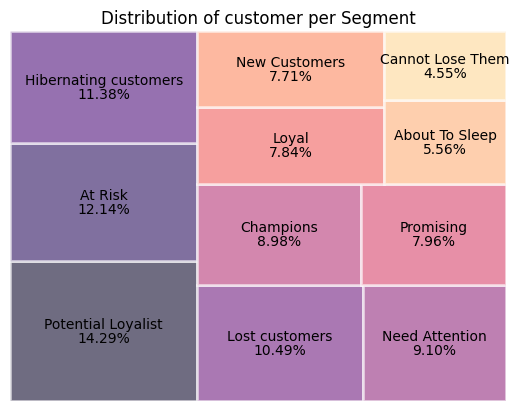

In [139]:
# Treemap to vizualize distribution of customer each segment
sq.plot(sizes = segmentation['Customer ID'],
        # ec = 'white',
        color = sns.color_palette("magma", len(segmentation['Customer ID'])),
        label=segmentation['Segment'],
        alpha =0.6,
        bar_kwargs=dict(linewidth=2, edgecolor="white"),
        value=[f'{x:.2f}%' for x in segmentation['customer_dis']])

# Remove the axis:
plt.axis("off")
plt.title('Distribution of customer per Segment')
plt.show()

Certainly, based on the provided customer segments and their respective percentages, I'll analyze each segment to give an understanding of their characteristics and implications for the company's market expansion strategy:

1. **Potential Loyalists (14.2%):**
   - These are customers who have shown potential for becoming loyal to the company's products or services.
   - They might have had a positive experience with the company but haven't reached full loyalty yet.
   - The company should focus on nurturing this segment through personalized engagement and excellent customer service.

2. **At Risk (12.1%):**
   - These are customers who are at risk of churning or leaving the company.
   - The company needs to identify the reasons for their dissatisfaction and implement strategies to retain them, such as special offers or improved customer support.

3. **Hibernating Customers (11.4%):**
   - These customers were active in the past but haven't engaged recently.
   - The company should re-engage this segment with targeted marketing campaigns, promotions, or new product launches.

4. **Lost Customers (10.5%):**
   - These are customers who have stopped purchasing from the company.
   - While it's challenging to win them back, the company could consider reactivation campaigns or surveys to understand their reasons for leaving.

5. **Need Attention (9.1%):**
   - These customers might be dissatisfied or facing issues with the company's offerings.
   - Prioritize addressing their concerns promptly to prevent them from becoming "At Risk" or "Lost Customers."

6. **Champions (9%):**
   - Champions are highly satisfied and loyal customers who can act as brand advocates.
   - Leverage this segment to spread positive word-of-mouth and potentially attract new customers.

7. **Promising (8%):**
   - Promising customers show potential for becoming loyal but haven't reached that stage yet.
   - Similar to "Potential Loyalists," focus on nurturing this segment through personalized interactions.

8. **Loyal (7.8%):**
   - These customers are already loyal to the company's offerings.
   - Maintain strong relationships with them, offer loyalty rewards, and encourage repeat purchases.

9. **New Customers (7.7%):**
   - These are recent additions to the customer base.
   - The company should provide a positive onboarding experience to convert them into loyal customers.

10. **About To Sleep (5.6%):**
    - These customers might be decreasing their engagement with the company.
    - Implement strategies to re-engage them before they become "Hibernating Customers."

11. **Cannot Lose Them (4.6%):**
    - This segment likely consists of high-value customers.
    - The company should prioritize providing exceptional service to retain their loyalty.

In summary, this segmentation provides valuable insights into the existing customer base, helping the company tailor its strategies to cater to each segment's unique needs. It's important to consider the appropriate actions for each segment to maximize customer retention, acquisition, and overall growth.

# 4.Analyze

In [140]:
# Calculate the mean of each elements R, F, M
segmentation_df = merge_df.groupby('Segment').agg(cus_count=('Customer ID','count'),
                                                    avg_recency=('Recency','mean'),
                                                    avg_frequency=('Frequency','mean'),
                                                    sum_monetary=('Monetary','sum')).round(1).reset_index()


In [141]:
# Checking dataframe
segmentation_df

,Segment,cus_count,avg_recency,avg_frequency,sum_monetary
0,About To Sleep,44,135.2,4.8,47310.1
1,At Risk,96,259.0,7.3,385996.9
2,Cannot Lose Them,36,496.5,4.7,150229.9
3,Champions,71,28.5,9.8,382096.6
4,Hibernating customers,90,190.0,4.7,109960.3
5,Lost customers,83,558.0,3.0,54264.2
6,Loyal,62,60.7,8.2,270680.2
7,Need Attention,72,50.1,6.5,259412.4
8,New Customers,61,41.5,3.4,40997.1
9,Potential Loyalist,113,45.2,7.1,190944.9


## 4.1 Vizualize Recency by Segment

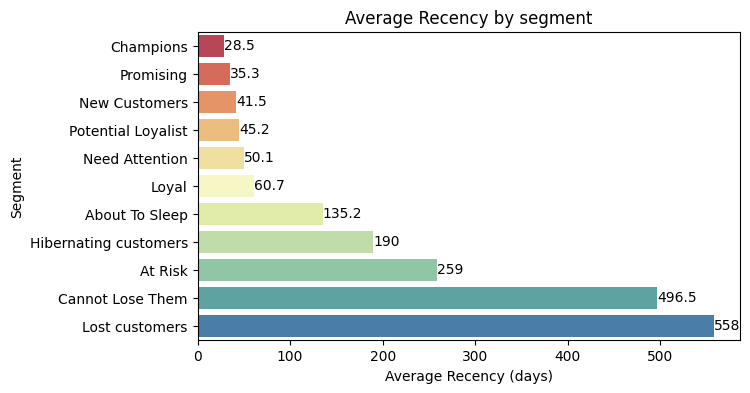

In [142]:
fig, ax = plt.subplots(1, figsize = (7,4))
sns.barplot(data=segmentation_df.sort_values("avg_recency"),
            x="avg_recency",
            y="Segment",
            palette='Spectral')
# Display recency in the barplot
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Average Recency by segment')
ax.set_xlabel('Average Recency (days)')
ax.set_ylabel('Segment')
plt.show()

 **Insight**:
- Two groups that are significant to the company are *Protencial Loyalists* and. There is a need for a strategy to decrease the recency of these two categories, particularly *Protencial Loyalists*, who are almost-loyal pertencial consumers. The business should decrease the recency of this group to turn them into devoted customers.
- *Loyal* group seeems to have pretty hight recency (abour 60 days), The company needs to launch a campaign for this customer group to show gratitude as well as reduce the average recency. However, we need to look at. However, we also need to take a closer look at the order value and the distance between the purchases of this group to be able to analyze more closely.
-The *New Customers* group needs to be taken care of carefully to become potential customers for the business

## 4.2. Vizualize Frequency by segment

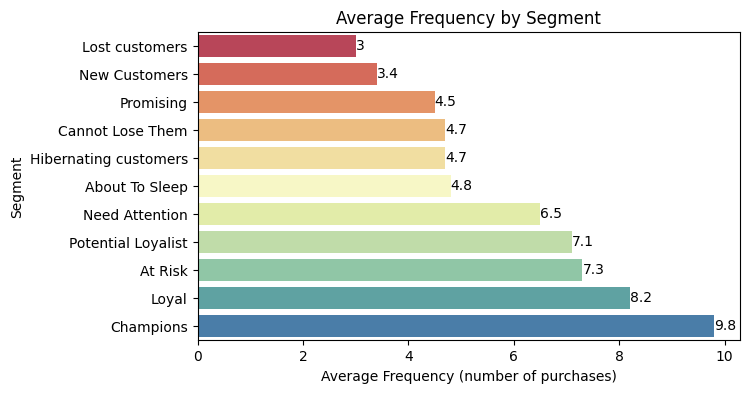

In [143]:
fig, ax = plt.subplots(1, figsize = (7,4))
sns.barplot(data=segmentation_df.sort_values('avg_frequency'),
            x='avg_frequency',
            y='Segment',
            palette='Spectral')
# Display recency in the barplot
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Average Frequency by Segment')
ax.set_xlabel('Average Frequency (number of purchases)')
plt.show()

**Insight**
- Segment Engagement vs. Frequency: Champions exhibit both a high percentage (9%) and an impressive average frequency (9.8). Their engagement aligns with their frequency, indicating a strong and consistent relationship with the company.

- Retention Challenge: The "Lost Customers" segment has a relatively high percentage (10.5%) and a lower frequency (3.0). This suggests a challenge in retaining these customers, as they were once engaged but have significantly reduced interaction.

- Promising Potential: The "Promising" segment may only constitute 8% of customers, but their relatively high average frequency (8.2) implies a noteworthy opportunity for conversion to more loyal segments.

- Strategic Attention: "Need Attention" customers, with 9.1% representation and a reasonable frequency (6.5), should be a priority for strategic efforts. Their engagement can be preserved through timely responses to their needs.

## 4.3 Vizualize Monetary by Segment

In [144]:
# Adding new colnum in which calculate the percentage of of monetary in each segment
segmentation_df['monetary percent']= round(segmentation_df['sum_monetary']*100/segmentation_df['sum_monetary'].sum(),2)
segmentation_df

,Segment,cus_count,avg_recency,avg_frequency,sum_monetary,monetary percent
0,About To Sleep,44,135.2,4.8,47310.1,2.24
1,At Risk,96,259.0,7.3,385996.9,18.24
2,Cannot Lose Them,36,496.5,4.7,150229.9,7.10
3,Champions,71,28.5,9.8,382096.6,18.05
4,Hibernating customers,90,190.0,4.7,109960.3,5.19
5,Lost customers,83,558.0,3.0,54264.2,2.56
6,Loyal,62,60.7,8.2,270680.2,12.79
7,Need Attention,72,50.1,6.5,259412.4,12.26
8,New Customers,61,41.5,3.4,40997.1,1.94
9,Potential Loyalist,113,45.2,7.1,190944.9,9.02


Text(0.5, 1.0, 'Percentage of Monetary each Segments')

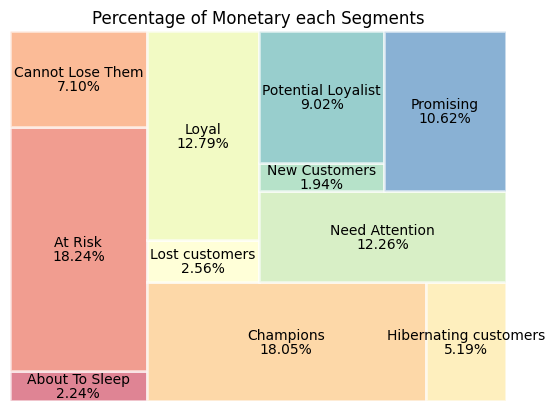

In [145]:
# Treemap to vizualize monetary of customer segment
sq.plot(sizes = segmentation_df['sum_monetary'],
        color = sns.color_palette('Spectral', len(segmentation_df['Segment'])),
        label=segmentation_df['Segment'],
        alpha =0.6,
        bar_kwargs=dict(linewidth=2, edgecolor="white"),
        value=[f'{x:.2f}%' for x in segmentation_df['monetary percent']],
        norm_x=130,
        norm_y=130)

# Remove the axis:
plt.axis("off")
plt.title('Percentage of Monetary each Segments')
# plt.show()

**Insight**
- *Champions*: Although their percentage is relatively low, Champions contribute significantly to revenue. Nurturing these loyal customers is crucial for sustained growth.

- *At Risk*: With a high monetary contribution, this segment needs immediate attention to prevent churn and retain their substantial revenue impact.

- *Need Attention*: These customers contribute significantly to revenue, and addressing their needs promptly can safeguard their loyalty and revenue stream.

- *Promising*: While their percentage might be moderate, the potential for high-value contributions makes converting these customers into loyal segments a priority.

## 4.4 percentage of customer who buy more than 1 order

In [146]:
# use dataframe comp_order, which is eliminated all returned order, to count number of orders by customers
number_of_orders = comp_orders.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False)
#Rename column in number_of_orders df
number_of_orders_df = pd.DataFrame(list(number_of_orders.items()), columns=['Customer ID', 'Number of Orders'])
# Draw pie chart to show percentage of customer who by more than 1 orders
a = number_of_orders_df[number_of_orders_df['Number of Orders'] == 1].value_counts().sum()
b = number_of_orders_df[number_of_orders_df['Number of Orders'] != 1].value_counts().sum()

data = {'Order': ['One Order', 'More than One Order'], 'Customer_Counts': [a, b]}

order_counts = pd.DataFrame.from_dict(data)

fig = px.pie(order_counts,
             values = order_counts.Customer_Counts,
             names = order_counts.Order,
             color_discrete_sequence=px.colors.sequential.Bluyl)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)),
                  title='Percentage customer who buy more than one order')
fig.update_layout(
    font=dict(size=22,color='RebeccaPurple'))
fig.show()

**Insight:** Most customers order more than 1 order

## 4.5 Analyze category

In [147]:
product=product.drop_duplicates(subset='Product ID', keep='first')

In [148]:
# From orders df, eliminate all returned orders to create product_categories df
orders_and_return = orders.merge(returned, on='Order ID', how='left', indicator=True )
sud_df = orders_and_return.loc[orders_and_return['_merge']=='left_only', 'Order ID']
all_comp_orders = orders[orders['Order ID'].isin(sud_df)]

In [149]:
product_category= all_comp_orders.merge(product, on='Product ID', how='left')

In [150]:
# Create new df called number_of_prod which present number of order in each category
number_of_prod = product_category.groupby('Category')['Customer ID'].count().sort_values(ascending=False).reset_index()
# Rename column
number_of_prod.rename(columns = {'Customer ID':'Number_of_Products'}, inplace = True)
# Draw pie chart to show which category has highest purchases
fig = px.pie(number_of_prod,
             values='Number_of_Products',
             names = 'Category',
             color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=16,
                  marker = dict(line = dict(color = 'white', width = 6)),
                  title='Percentage of purchase in each category')
fig.update_layout(
    font=dict(size=20,color='RebeccaPurple'))

fig.show()

**Insight:** The majority of purchases (60.4%) are focused on "Office Supplies," reflecting practical and essential needs. "Furniture" (21.2%) represents considered investments, while "Technology" (18.4%) indicates a steady interest in modern gadgets.




## 4.6 Percentage of order each Segment

In [151]:
product_category.head(2)

,Row ID_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Row ID_y,Category,Sub-Category,Product Name
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,554,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,719,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass..."


In [152]:
# drop unnecessary column
product_category=product_category.drop(['Postal Code','Unit Cost','Row ID_x','Row ID_y','Product Name'], axis=1)

In [153]:
# merge product_category DF with merge_df DF to get a DF has all orders, customer ID an segment name
product_category_segment=product_category.merge(merge_df, how='left', on='Customer ID')

In [154]:
product_category_segment.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Product ID,Sales,Quantity,Category,Sub-Category,Recency,Frequency,Monetary,R,F,M,cusRFM_Score,Segment,rfm_score
0,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,OFF-AP-10002457,209.300,2,Office Supplies,Appliances,1,8,2133.180,5,4,3,543,Loyal,543
1,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,FUR-BO-10003441,323.136,4,Furniture,Bookcases,1,7,2493.214,5,3,4,534,Need Attention,534


In [155]:
# Count number of order by segment
num_order_by_segment = product_category_segment.groupby('Segment')['Order ID'].count().sort_values(ascending=False).reset_index()

# Rename column
num_order_by_segment.rename(columns = {'Order ID':'Number_of_orders'}, inplace = True)

In [156]:
# Draw pie chart to show which category has highest purchases
fig = px.pie(num_order_by_segment,
             values='Number_of_orders',
             names = 'Segment',
             color_discrete_sequence=px.colors.sequential.matter_r)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=18,
                  marker = dict(line = dict(color = 'white', width = 2.5)),
                  title='Percentage of Orders in each Segment.')
fig.update_layout(
    font=dict(size=22,color='RebeccaPurple'))
fig.show()

**Insight**: In comparison to the previous breakdown of customer allocation by segment, the arrangement of segments in the allocation table by order is notably distinct:

- The segment labeled ***At Risk*** holds the highest count of orders (additionally, it's the second-largest in terms of customer count). This highlights the significance of targeting customers from this group in the company's marketing efforts, given their substantial numbers in both customers and orders. Despite their large presence, these customers are at risk of attrition.

- The ***Potential Loyalist*** segment registers a similar order count as the "At Risk" group.

- Interestingly, the ***Champion*** and ***Loyal*** segments, although not having the most extensive customer base (as per the previous customer distribution table), secure the third-highest order count.

- Positioned as the fifth-largest in customer count, the ***Need Attention*** segment makes up 10.7% of the total order count. This underscores the importance of driving sales within this group, warranting dedicated attention.

## 4.7 Number of cancelled order

**Target**: Figure out how many orders had been cancelled

In [157]:
returned_order= orders_and_return.merge(product, on='Product ID', how='left')

In [158]:
# Filter all orders that had been returned into cancelled_order DF
cancelled_order=returned_order[returned_order['Returned']=='Yes']
cancelled_order.head()

,Row ID_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned,_merge,Row ID_y,Category,Sub-Category,Product Name
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,Yes,both,535,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl"
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225,Yes,both,575,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System
12,5457,CA-2017-130631,2017-12-29,2018-01-02,Standard Class,BS-11755,Consumer,98026,OFF-FA-10000089,19.600,5,1.9992,Yes,both,1774,Office Supplies,Fasteners,Acco Glide Clips
13,5458,CA-2017-130631,2017-12-29,2018-01-02,Standard Class,BS-11755,Consumer,98026,FUR-FU-10004093,68.460,2,23.9610,Yes,both,1193,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame
24,954,CA-2017-136539,2017-12-28,2018-01-01,Standard Class,GH-14665,Consumer,78664,OFF-AR-10001958,27.168,2,12.2256,Yes,both,209,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...


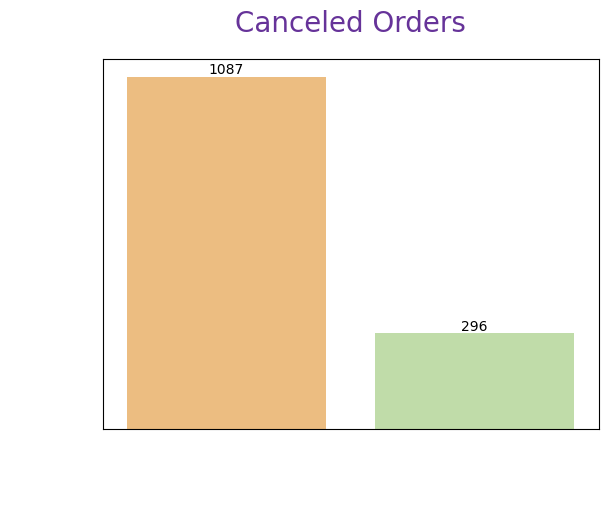

In [159]:
# Creadte dataframeto count total order and total canceled order
c = product_category_segment['Customer ID'].nunique() + cancelled_order ['Order ID'].nunique()
d = cancelled_order ['Order ID'].nunique()
data = {'Orders': ['Total Orders', 'Canceled Orders'], 'Order_Counts': [c, d]}
order_counts = pd.DataFrame.from_dict(data)

# Vizualize
fig, ax = plt.subplots()
sns.barplot(ax = ax, data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette= 'Spectral')

ax.bar_label(ax.containers[0]) #To display value in the chart
ax.tick_params(axis='y', colors='white', labelsize=10)

ax.set_title("Canceled Orders", fontsize = 20, pad = 20, color='RebeccaPurple')
ax.set_xlabel("Orders", fontsize = 18, labelpad = 12, color='white')
ax.set_ylabel("Counts", fontsize = 18, labelpad = 12, color='white')
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

### Percentage of return order in total

In [160]:
# Draw pie chart to show which category has highest purchases
fig = px.pie(order_counts,
             values='Order_Counts',
             names = 'Orders',
             color_discrete_sequence=px.colors.sequential.Bluyl)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=18,
                  marker = dict(line = dict(color = 'white', width = 2.5)),
                  title='Percentage of return order in total')
fig.update_layout(
    font=dict(size=22,color='RebeccaPurple'))
fig.show()

**Insight:** The company faces a significant challenge with a 21.4% return rate, which means roughly one in five orders is being returned. However, it's worth noting that the majority, 78.6%, of orders are successful. To improve profitability and customer satisfaction, reducing the return rate should be a top priority while also focusing on optimizing the overall order fulfillment process.

##  4.8. Percentage of returned order in each category/Sub-category

In [161]:
count_cancelled_order= cancelled_order.groupby(['Category','Sub-Category'])['Order ID'].count().reset_index()
# Rename column
count_cancelled_order.rename(columns = {'Order ID':'num_order'}, inplace = True)

count_cancelled_order.head()

,Category,Sub-Category,num_order
0,Furniture,Bookcases,16
1,Furniture,Chairs,53
2,Furniture,Furnishings,72
3,Furniture,Tables,30
4,Office Supplies,Appliances,40


In [162]:
# Draw pie chart to show which category has highest purchases
fig = px.pie(count_cancelled_order,
             values='num_order',
             names = 'Category',
             color_discrete_sequence=px.colors.sequential.deep)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=18,
                  marker = dict(line = dict(color = 'white', width = 2.5)),
                  title='Percentage of returned orders in each Category')
fig.update_layout(
    font=dict(size=22))
fig.show()

**Comment:**
- The company's return percentages reveal that the Office Supplies category has the highest return rate (59.1%),Furniture category (21.4% returns), Technology category (19.5% returns)
-> Overall, the company should prioritize resolving issues in the high-return Office Supplies segment and continually work on reducing returns in all categories to enhance customer satisfaction and profitability.

In [163]:
#  Treemap that illustrate percentage of returned order in each Sub-category
fig = px.treemap(count_cancelled_order,
                 path=['Category', 'Sub-Category'],
                 values='num_order',
                 color="Sub-Category",
                 width=1000, height=700,
                 title="Percentage of returned orders in each Sub-Category")

fig.show()


**Comment:**
- In the *Office Supplies* category, the Binders group experienced the highest rate of cancellations, followed by the Paper group, with the Storage group coming in third.

- Within the *Furniture* category, the Furnishings and Chairs groups had the highest cancellation rates.

- In the *Technology* category, the majority of canceled orders were attributed to the Phones and Accessories group

**General Recommendations:**
Data Analysis: Continuously monitor cancellation trends and analyze customer feedback to adapt to changing market dynamics.

- *Marketing and Communication:* Improve product descriptions and marketing strategies for categories with high cancellation rates to set accurate customer expectations.

- *Customer Engagement:* Implement customer engagement programs, loyalty rewards, or satisfaction surveys to gauge and improve customer loyalty and satisfaction.

- *Supplier Relations:* If applicable, work closely with suppliers to enhance the quality and consistency of products in problematic categories.

- *Diversification:* Consider diversifying product offerings or expanding into new categories with better market potential to mitigate the impact of high cancellation rates in specific areas.